# Waffle Charts

By **Franklin Oliveira**

-----
This notebook contains all code written to make the Waffle Charts of `poliquetas` collection in file: <font color='blue'>'IBUFRJ27.07.2020 - visualização.xlsx'</font>.

## Basic imports

In [1]:
import datetime
import numpy as np
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt

from collections import defaultdict

# this package does most of the heavy work of constructing the Waffle Charts
# docs: https://pywaffle.readthedocs.io/en/latest/examples/block_shape_distance_location_and_direction.html
from pywaffle import Waffle 

alt.renderers.enable('default')

RendererRegistry.enable('default')

## Importing data...

In [2]:
NewTable = pd.read_csv('./data/merged_db.csv', sep=';', encoding='utf-8-sig')

<br>

<font size=5>**Color Palette per Order**</font>

These images were used as inspiration (https://color.adobe.com/create/image)

<img src="./src/img1.jpg" width='500px'>

<img src="./src/img2.jpg" width='500px'>

Cores: 

    '#8ABFB0',  # azul claro
    '#41A681',  # verde
    '#7ACAAB',  # verde claro
    '#D9C2AD',  # bege
    '#0D0D0D',  # preto
    '#D96236',  # laranja
    '#D94B18',  # laranja escuro
    '#FFB27C',  # cor de pele clara
    '#732C02',  # marrom
    '#86471B',  # mostarda

In [3]:
# 220 NaNs
NewTable['order'].value_counts(dropna=False)

Phyllodocida        2430
Eunicida            1496
Sabellida            753
Scolecida            698
Amphinomida          464
Spionida             436
Terebellida          387
NaN                  242
Sipuncula              9
Canalipalpata          6
Aspidosiphonida        1
Crassiclitellata       1
Name: order, dtype: int64

In [4]:
ordens = NewTable['order'].unique()
cores = [
    '#8ABFB0',  # azul claro
    '#41A681',  # verde
    '#7ACAAB',  # verde claro
    '#D9C2AD',  # bege
    '#0D0D0D',  # preto
    '#D96236',  # laranja
    '#D94B18',  # laranja escuro
    '#FFB27C',  # cor de pele clara
    '#732C02',  # marrom
    '#86471B',  # mostarda
    
    # cores novas para Canalipalpata e Aspidosiphonida (a ordem é aleatória. Fixar depois)
    '#592202',
    '#D96236'
]

cores_ordem = defaultdict()
for j in range(len(ordens)):
    ordem = ordens[j]
    cores_ordem[ordem] = cores[j]
    
cores_ordem = dict(cores_ordem)

## Waffle Charts

----

### 1- Orders

In [5]:
def calcPercentages(df, col='order', discard_col= 'index'):
    
    if discard_col == 'index':
        temp = df.reset_index()
    else:
        temp = df
    
    percent = temp.groupby(col).count()[discard_col].reset_index().rename(
                                                                    columns={discard_col:'counts'})
    percent['percent'] = percent['counts'] / percent['counts'].sum()
    percent['percent'] = percent['percent'] * 100
    
    return percent

In [6]:
percent = calcPercentages(NewTable)
percent.head()

,order,counts,percent
0,Amphinomida,464,6.945068
1,Aspidosiphonida,1,0.014968
2,Canalipalpata,6,0.089807
3,Crassiclitellata,1,0.014968
4,Eunicida,1496,22.391858


In [7]:
# adicionando coluna com as cores por ordem
percent['cores'] = percent['order'].apply(lambda x: cores_ordem[x])

In [8]:
percent.sort_values('percent', inplace=True)

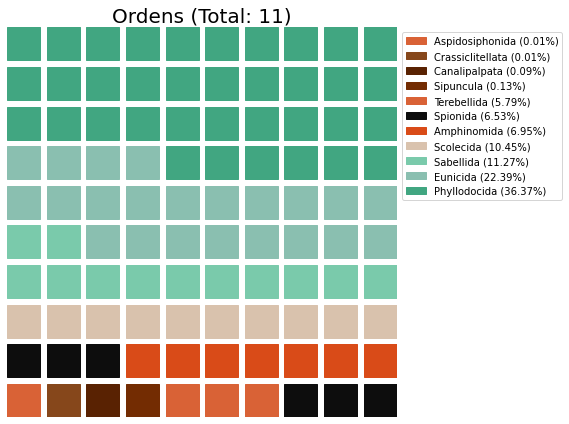

In [69]:
# standard figure
fig1 = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
#     columns=10, 
    tight_layout=True,
    rounding_rule='floor',
    values=[i for i in percent['percent']],
    colors=list(percent['cores']),
    title={
        'label': f'Ordens (Total: {11})', 
        'loc': 'center',
        'fontdict': {
            'fontsize':20
        }
    },
    labels=["{0} ({1}%)".format(k, round(v, 2)) for k, v in zip(percent['order'], percent['percent'])],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icon_size=18,
    vertical= True,
    icon_legend=True,
#     block_arranging_style='snake',  # new-line
#     legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    figsize=(10, 6)  # figsize is a parameter of matplotlib.pyplot.figure
)

plt.savefig('./graphs/waffles/ordens.svg')
plt.savefig('./graphs/waffles/ordens.png')

plt.show()

<br>

<font color='red' size='5'>**Problema:** No gráfico acima, ele insiste em desenhar ordens de valor muito pequeno </font>

<br>

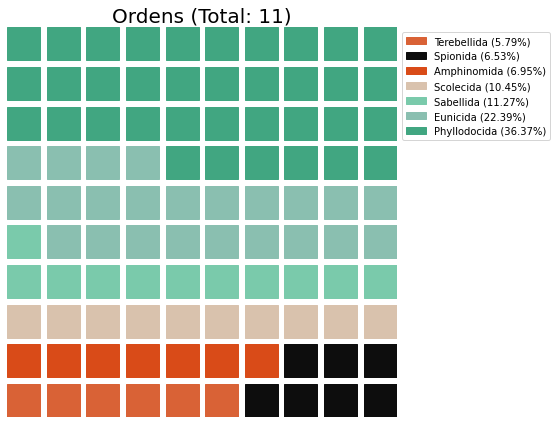

In [71]:
# standard figure
fig1 = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
#     columns=10, 
    tight_layout=True,
    rounding_rule='floor',
    values=[round(i,1) for i in percent['percent'] if round(i) > 0],
    colors=[c for c,v in zip(percent['cores'], percent['percent']) if round(v) > 0],
    title={
        'label': f'Ordens (Total: {11})', 
        'loc': 'center',
        'fontdict': {
            'fontsize':20
        }
    },
    labels=["{0} ({1}%)".format(k, round(v, 2)) for k, v in zip(percent['order'], percent['percent']) if round(v) > 0],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icon_size=18,
    vertical= True,
    icon_legend=True,
    block_arranging_style='snake',  # new-line
#     legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    figsize=(10, 6)  # figsize is a parameter of matplotlib.pyplot.figure
)

plt.savefig('./graphs/waffles/ordens1.svg')
plt.savefig('./graphs/waffles/ordens1.png')

plt.show()

In [21]:
NewTable['order'].nunique()

11

In [58]:
[round(i) for i in percent['percent']]

[0, 0, 0, 0, 6, 7, 7, 10, 11, 22, 36]

<br>

-----

### 2- Orders per family

In [11]:
percent = calcPercentages(NewTable[NewTable['family'] == 'Eunicidae'])
percent.sort_values('counts', inplace=True)

In [12]:
# adicionando coluna com as cores por ordem
percent['cores'] = percent['order'].apply(lambda x:cores_ordem[x])

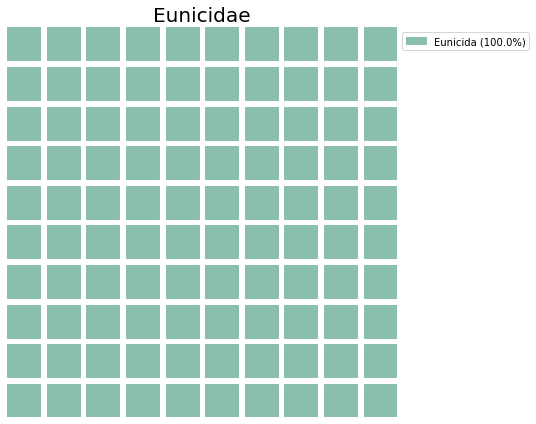

In [13]:
# standard figure
fig1 = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
#     columns=10, 
#     rounding_rule='floor',
    values=list(percent['percent']),
    colors=list(percent['cores']),
    title={
        'label': 'Eunicidae', 
        'loc': 'center',
        'fontdict': {
            'fontsize':20
        }
    },
    labels=["{0} ({1}%)".format(k, round(v, 2)) for k, v in zip(percent['order'], percent['percent'])],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icon_size=18,
    vertical= True,
    icon_legend=True,
#     legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    figsize=(10, 6)  # figsize is a parameter of matplotlib.pyplot.figure
)

# plt.savefig('./graphs/waffles/ordens.svg')
# plt.savefig('./graphs/waffles/ordens.png')

plt.show()

In [24]:
family_counts = NewTable['family'].value_counts().reset_index()
family_counts.columns = ['family', 'count']

NewTable.sort_values('order', inplace=True)

In [25]:
d = defaultdict()

index=0
for family in NewTable['family'].unique():
    # filtrando a base e calculando percentuais
    temp = calcPercentages(NewTable[NewTable['family']==family])
    temp.sort_values('percent', inplace=True)
    
    # criando coluna de cores
    temp['cores'] = temp['order'].apply(lambda x:cores_ordem[x])
    
    # contagem
    count = family_counts[family_counts['family'] == family]['count'].values[0] 
       
    index +=1
    
    #dict for chart
    d[(6,10,index)]= { 
        'rows':10, 
    #     columns=10, 
    #     rounding_rule='floor',
        'values':list(temp['percent']),
        'colors':list(temp['cores']),
        # p.s.: thousands separator is: ,
        'title':{
            'label': f'Família: {family}\nTotal de registros: {count}'.replace(',','.'),
            'loc': 'left', 'fontsize':18},
        'icon_legend':True,
    }
        
d = dict(d)
# d

#### Making `waffle charts`

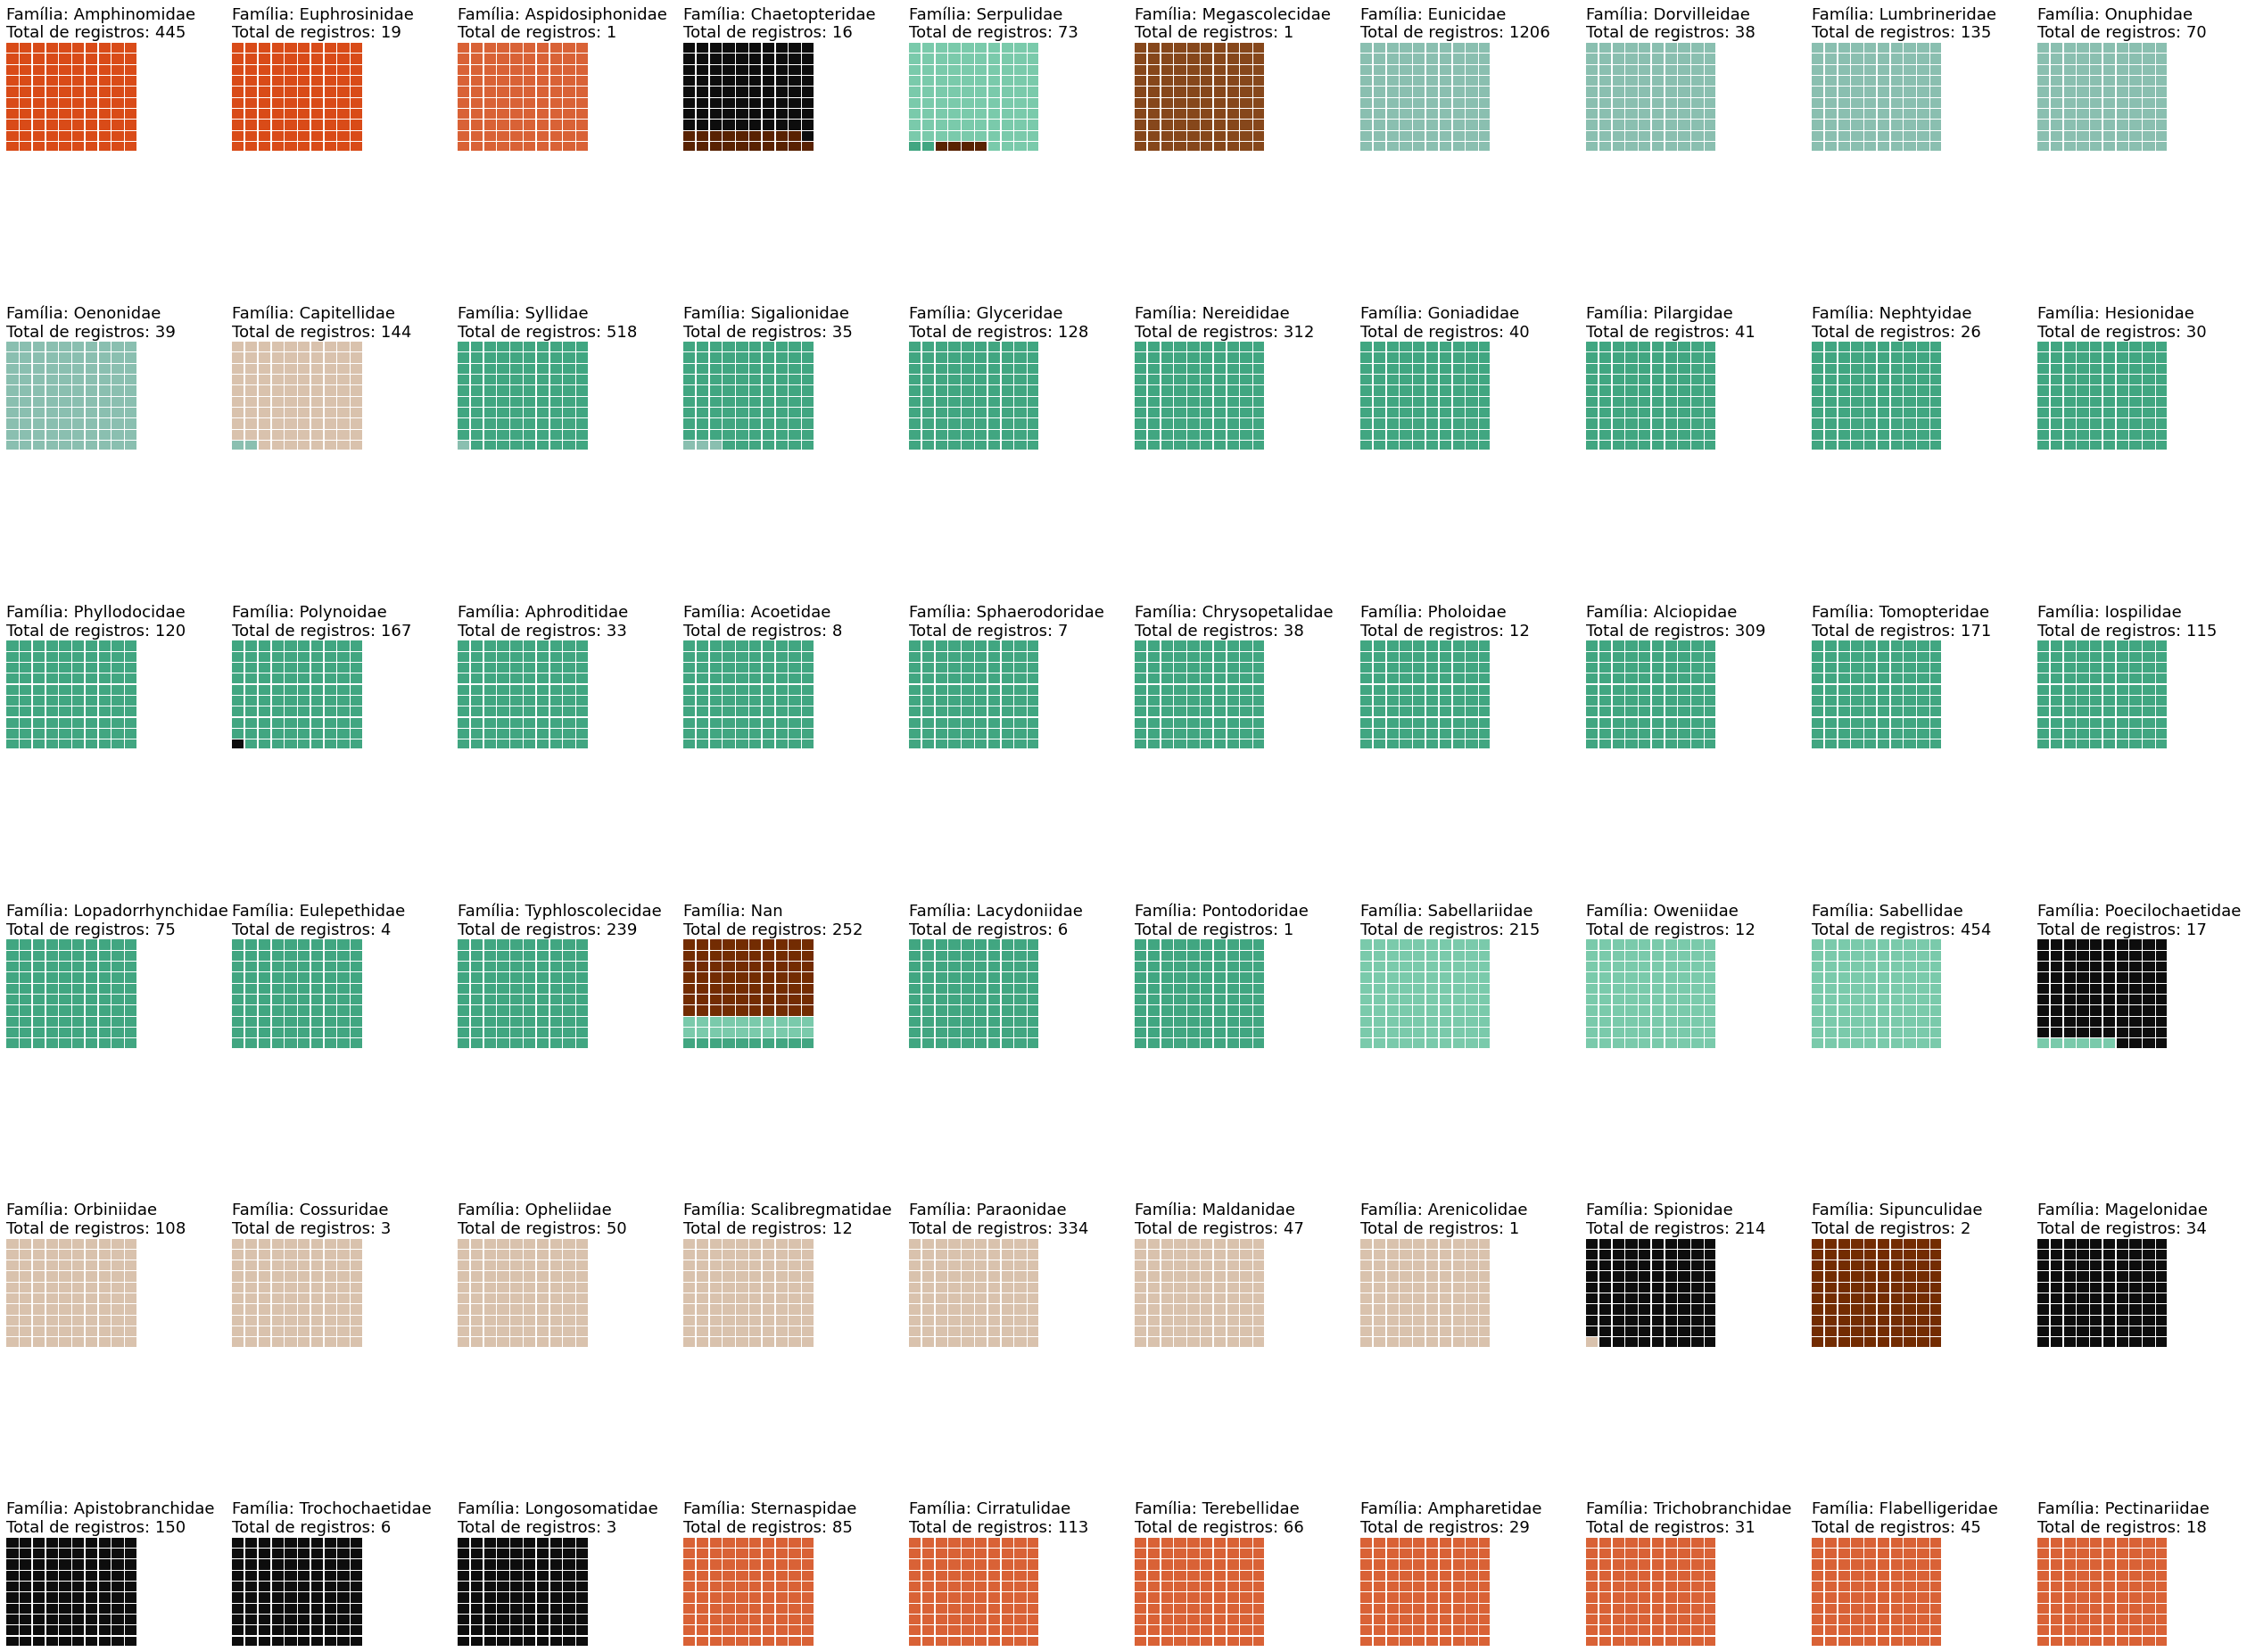

In [26]:
teste = plt.figure(
    FigureClass= Waffle,
    plots= d,
    rows=10, 
#     columns=10, 
    vertical=True, 
    block_aspect_ratio=1.2,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    figsize=(35, 35)  # figsize is a parameter of matplotlib.pyplot.figure
    
)

# saving charts
# plt.savefig('./graphs/waffles/familias.svg')
plt.savefig('./graphs/waffles/familias.png')

<br>

**The end!**

-----

In [17]:
# for col in NewTable.columns:
#     print('-', col)

In [18]:
# contar quantas ordens diferentes tem por familia

d = defaultdict()
for family in NewTable['family'].unique():
    d[family] = NewTable[NewTable['family'] == family]['order'].nunique()

In [19]:
#dict(d)